# Ground state energy estimation of a spin (qubit) Hamiltonian

This tutorial shows the available tools in the ``sqd`` package to project arbitrary 
linear combinations of Pauli strings into subspaces defined by subsets of the computational
basis. We also show how to find the ground state of the resulting operator.

The Hamiltonian of interest can be written as:
$$
H = \sum_i \alpha_i P_i,
$$
with $\alpha_i$ being real coefficients and $P_i$ Pauli strings. A wide class
of many-body Hamiltonians can be written as the linear combination of poly-many 
Pauli strings, including interacting-electron Hamiltonians, spin Hamiltonians, etc.

In particular, we consider the ground state properties of the antiferromagnetic XX-Z spin-1/2 chain
with $L = 22$ sites:
$$
H = \sum_{\langle i, j \rangle} J_{xy}\left( \sigma^x_i\sigma^x_j + \sigma^y_i\sigma^y_j \right) + \sigma^z_i\sigma^z_j.
$$
We show how to compute an approximation to the ground state and two-point correlators.

The aim of this tutorial is to focus on the post-processing of the samples obtained
from a quantum circuit whose support coincides with is of the ground state. Consequently,
we generate a synthetic set of bitstrings to define the subspace. 

### Subspace definition

For this example we generate a synthetic length-22 bitstring dataset. For the projection
functions to work as expected, it is essential that the bitstrings that define
the subspace are unique and sorted according to their base-10 representation.

This can be achieved with the ``qiskit_addon_sqd.qubit.sort_and_remove_duplicates()``
function.

In [1]:
import numpy as np
from qiskit_addon_sqd.qubit import sort_and_remove_duplicates

num_spins = 22  # number of spins
bitstring_matrix = np.array([[i % 2 == 0 for i in range(num_spins)]], dtype=bool)
bitstring_matrix = np.concatenate((bitstring_matrix, np.roll(bitstring_matrix, 1, axis=1)))
for i in range(num_spins):
    for j in range(num_spins // 2):
        domain_wall = bitstring_matrix[0].copy()
        domain_wall[i] -= 1
        domain_wall[(i + 1 + j * 2) % num_spins] -= 1
        bitstring_matrix = np.concatenate((bitstring_matrix, np.expand_dims(domain_wall, axis=0)))
        domain_wall = bitstring_matrix[1].copy()
        domain_wall[i] -= 1
        domain_wall[(i + 1 + j * 2) % num_spins] -= 1
        bitstring_matrix = np.concatenate((bitstring_matrix, np.expand_dims(domain_wall, axis=0)))

# NOTE: It is essential for the projection code to have the bitstrings sorted!
bitstring_matrix = sort_and_remove_duplicates(bitstring_matrix)

### Write the Hamiltonian

In [2]:
from qiskit.transpiler import CouplingMap
from qiskit_addon_utils.problem_generators import generate_xyz_hamiltonian

coupling_map = CouplingMap.from_ring(num_spins)
hamiltonian = generate_xyz_hamiltonian(coupling_map, coupling_constants=(0.3, 0.3, 1.0))
print(hamiltonian)

SparsePauliOp(['IIIIIIIIIIIIIIIIIIIIXX', 'IIIIIIIIIIIIIIIIIIIIYY', 'IIIIIIIIIIIIIIIIIIIIZZ', 'IIIIIIIIIIIIIIIIIIXXII', 'IIIIIIIIIIIIIIIIIIYYII', 'IIIIIIIIIIIIIIIIIIZZII', 'IIIIIIIIIIIIIIIIXXIIII', 'IIIIIIIIIIIIIIIIYYIIII', 'IIIIIIIIIIIIIIIIZZIIII', 'IIIIIIIIIIIIIIXXIIIIII', 'IIIIIIIIIIIIIIYYIIIIII', 'IIIIIIIIIIIIIIZZIIIIII', 'IIIIIIIIIIIIXXIIIIIIII', 'IIIIIIIIIIIIYYIIIIIIII', 'IIIIIIIIIIIIZZIIIIIIII', 'IIIIIIIIIIXXIIIIIIIIII', 'IIIIIIIIIIYYIIIIIIIIII', 'IIIIIIIIIIZZIIIIIIIIII', 'IIIIIIIIXXIIIIIIIIIIII', 'IIIIIIIIYYIIIIIIIIIIII', 'IIIIIIIIZZIIIIIIIIIIII', 'IIIIIIXXIIIIIIIIIIIIII', 'IIIIIIYYIIIIIIIIIIIIII', 'IIIIIIZZIIIIIIIIIIIIII', 'IIIIXXIIIIIIIIIIIIIIII', 'IIIIYYIIIIIIIIIIIIIIII', 'IIIIZZIIIIIIIIIIIIIIII', 'IIXXIIIIIIIIIIIIIIIIII', 'IIYYIIIIIIIIIIIIIIIIII', 'IIZZIIIIIIIIIIIIIIIIII', 'XXIIIIIIIIIIIIIIIIIIII', 'YYIIIIIIIIIIIIIIIIIIII', 'ZZIIIIIIIIIIIIIIIIIIII', 'XIIIIIIIIIIIIIIIIIIIIX', 'YIIIIIIIIIIIIIIIIIIIIY', 'ZIIIIIIIIIIIIIIIIIIIIZ', 'IIIIIIIIIIIIIIIIIIIXXI', 'IIIIIIIIIIIIIIIIIIIYYI

### Project and diagonalize the Hamiltonian

We request the 4 eigenstates of lowest energy

In [3]:
from qiskit_addon_sqd.qubit import solve_qubit

scipy_kwargs = {"k": 4, "which": "SA"}
energies, eigenstates = solve_qubit(bitstring_matrix, hamiltonian, verbose=True, **scipy_kwargs)

ground_state = eigenstates[:, 0]

Projecting term 1 out of 66: (0.3+0j) * IIIIIIIIIIIIIIIIIIIIXX ...
Projecting term 2 out of 66: (0.3+0j) * IIIIIIIIIIIIIIIIIIIIYY ...
Projecting term 3 out of 66: (1+0j) * IIIIIIIIIIIIIIIIIIIIZZ ...
Projecting term 4 out of 66: (0.3+0j) * IIIIIIIIIIIIIIIIIIXXII ...
Projecting term 5 out of 66: (0.3+0j) * IIIIIIIIIIIIIIIIIIYYII ...
Projecting term 6 out of 66: (1+0j) * IIIIIIIIIIIIIIIIIIZZII ...
Projecting term 7 out of 66: (0.3+0j) * IIIIIIIIIIIIIIIIXXIIII ...
Projecting term 8 out of 66: (0.3+0j) * IIIIIIIIIIIIIIIIYYIIII ...
Projecting term 9 out of 66: (1+0j) * IIIIIIIIIIIIIIIIZZIIII ...
Projecting term 10 out of 66: (0.3+0j) * IIIIIIIIIIIIIIXXIIIIII ...
Projecting term 11 out of 66: (0.3+0j) * IIIIIIIIIIIIIIYYIIIIII ...
Projecting term 12 out of 66: (1+0j) * IIIIIIIIIIIIIIZZIIIIII ...
Projecting term 13 out of 66: (0.3+0j) * IIIIIIIIIIIIXXIIIIIIII ...
Projecting term 14 out of 66: (0.3+0j) * IIIIIIIIIIIIYYIIIIIIII ...
Projecting term 15 out of 66: (1+0j) * IIIIIIIIIIIIZZIIIIIIII ...

In [4]:
print(energies)

[-23.45253539 -23.45253539 -18.         -18.        ]


### Compute spin-spin correlators

Let's compute spin-spin correlators along the $x$, $y$ and $z$ axes:
$$
C^x(l) = \frac{1}{L} \sum_{i = 1}^L \langle \sigma^x_i \sigma^x_{i + l} \rangle- 
\langle \sigma^x_i\rangle \langle \sigma^x_{i + l} \rangle
$$
$$
C^y(l) = \frac{1}{L} \sum_{i = 1}^L \langle \sigma^y_i \sigma^y_{i + l} \rangle-
\langle \sigma^y_i \rangle \langle \sigma^y_{i + l} \rangle
$$
$$
C^z(l) = \frac{1}{L} \sum_{i = 1}^L \langle \sigma^z_i \sigma^z_{i + l} \rangle-
\langle \sigma^z_i\rangle \langle \sigma^z_{i + l} \rangle
$$

In order to compute the connected spin-spin correlators we first need to compute the 
magnetization on each site along the three axes:

In [5]:
from qiskit.quantum_info import SparsePauliOp
from qiskit_addon_sqd.qubit import project_operator_to_subspace

s_x = np.zeros(num_spins)
s_y = np.zeros(num_spins)
s_z = np.zeros(num_spins)

for i in range(num_spins):
    # Sigma_x
    pstr = ["I" for _ in range(num_spins)]
    pstr[i] = "X"
    pauli_op = SparsePauliOp("".join(pstr))
    sparse_op = project_operator_to_subspace(bitstring_matrix, pauli_op)
    s_x[i] += np.real(np.conjugate(ground_state).T @ sparse_op @ ground_state)

    # Sigma_y
    pstr = ["I" for i in range(num_spins)]
    pstr[i] = "Y"
    pauli_op = SparsePauliOp("".join(pstr))
    sparse_op = project_operator_to_subspace(bitstring_matrix, pauli_op)
    s_y[i] += np.real(np.conjugate(ground_state).T @ sparse_op @ ground_state)

    # Sigma_z
    pstr = ["I" for i in range(num_spins)]
    pstr[i] = "Z"
    pauli_op = SparsePauliOp("".join(pstr))
    sparse_op = project_operator_to_subspace(bitstring_matrix, pauli_op)
    s_z[i] += np.real(np.conjugate(ground_state).T @ sparse_op @ ground_state)

Text(0, 0.5, '<s_i>')

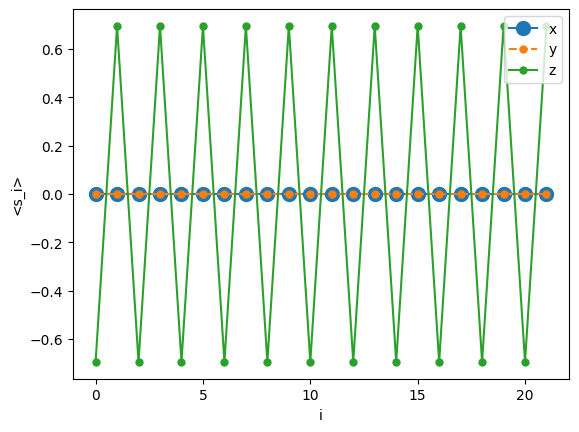

In [6]:
import matplotlib.pyplot as plt

plt.plot(s_x, marker=".", markersize=20, label="x")
plt.plot(s_y, marker=".", linestyle="--", markersize=10, label="y")
plt.plot(s_z, marker=".", markersize=10, label="z")

plt.legend()
plt.xlabel("i")
plt.ylabel("<s_i>")

Once we have computed the average magnetization on each site, we can compute the 
connected correlator as well.

In [7]:
max_distance = num_spins // 2

c_x = np.zeros(max_distance)
c_y = np.zeros(max_distance)
c_z = np.zeros(max_distance)
distance_counts = np.zeros(max_distance)

for i in range(num_spins):
    for j in range(i + 1, num_spins):
        j_wrap = j % num_spins  # Connect qubits N and 0
        distance = min([abs(i - j), abs(i + (num_spins - j))])

        # Sigma_x Sigma_x
        pstr = ["I" for _ in range(num_spins)]
        pstr[i] = "X"
        pstr[j_wrap] = "X"
        pauli_op = SparsePauliOp("".join(pstr))
        sparse_op = project_operator_to_subspace(bitstring_matrix, pauli_op)
        c_x[distance - 1] += (
            np.real(np.conjugate(ground_state).T @ sparse_op @ ground_state) - s_x[i] * s_x[j_wrap]
        )

        # Sigma_y Sigma_y
        pstr = ["I" for _ in range(num_spins)]
        pstr[i] = "Y"
        pstr[j_wrap] = "Y"
        pauli_op = SparsePauliOp("".join(pstr))
        sparse_op = project_operator_to_subspace(bitstring_matrix, pauli_op)
        c_y[distance - 1] += (
            np.real(np.conjugate(ground_state).T @ sparse_op @ ground_state) - s_y[i] * s_y[j_wrap]
        )

        # Sigma_z Sigma_z
        pstr = ["I" for _ in range(num_spins)]
        pstr[i] = "Z"
        pstr[j_wrap] = "Z"
        pauli_op = SparsePauliOp("".join(pstr))
        sparse_op = project_operator_to_subspace(bitstring_matrix, pauli_op)
        c_z[distance - 1] += (
            np.real(np.conjugate(ground_state).T @ sparse_op @ ground_state) - s_z[i] * s_z[j_wrap]
        )

        distance_counts[distance - 1] += 1
c_x /= distance_counts
c_y /= distance_counts
c_z /= distance_counts

Text(0, 0.5, '|C(l)|')

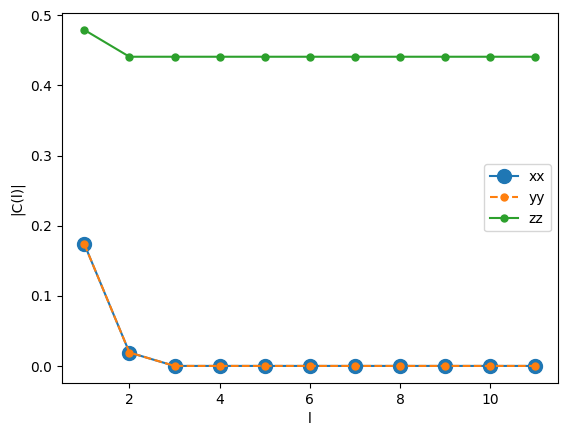

In [8]:
plt.plot(np.arange(1, max_distance + 1), np.abs(c_x), marker=".", markersize=20, label="xx")
plt.plot(
    np.arange(1, max_distance + 1),
    np.abs(c_y),
    marker=".",
    linestyle="--",
    markersize=10,
    label="yy",
)
plt.plot(np.arange(1, max_distance + 1), np.abs(c_z), marker=".", markersize=10, label="zz")

plt.legend()
plt.xlabel("l")
plt.ylabel("|C(l)|")